In [1]:
# pip install matplotlib numpy pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#from basic_units import cm, inch
import math

In [3]:
class Metric:
    def __init__(self,dictionary):
        self.__dict__.update(dictionary)
        self.error = max(np.std(values),self.error)

    def __init__(self, values, error, unit):
        self.values = values
        self.error = max(np.std(values),error)
        self.unit = unit

class Axis:
    major_tick_spacing = None
    minor_tick_spacing = None
    min = None
    max = None

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)

class GridSettings:
    x_axis = Axis({})
    y_axis = Axis({})

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)


class PhysicsObject:

    def __init__(self, ascii_name, axis_description, conjugated_name, mass):
        self.ascii_name = ascii_name
        self.axis_description = axis_description
        self.conjugated_name = conjugated_name
        self.mass = mass
    
    def __init__(self, dictionary):
        self.__dict__.update(dictionary)


class Rod(PhysicsObject):
    length = Metric([0],0,"")
    grid = GridSettings({})

class Disc(PhysicsObject):
    radius = Metric([0],0,"")
    grid = GridSettings({})


In [4]:
pret = Rod({
    "ascii_name" : "pret",
    "conjugated_name" : "pręta",
    "x_axis_description" : "Kwadrat odległości ciężarków od osi obrotu $R^2 [cm^2]$",
    "mass" : Metric([136, 136, 136], 1, "g"),
    "length" : Metric([61.9, 62.0, 62.9], 0.1, "cm"),
    "grid" : GridSettings({
        "x_axis" : Axis({
            "major_tick_spacing" : 200,
            "minor_tick_spacing" : 100,
            "min" : 0,
            "max" : 900,
        }),
        "y_axis" : Axis({
            "major_tick_spacing" : 25,
            "minor_tick_spacing" : 5,
            "min" : 5,
            "max" : 80
        })
    })
})

dysk = Disc({    
    "ascii_name" : "dysk",
    "conjugated_name" : "dysku",
    "x_axis_description" : "Kwadrat odległości środka dysku od osi obrotu $T^2 [cm^2]$",
    "mass" : Metric([436, 435, 435], 1, "g"),
    "radius" : Metric([32,32,32], 0.1, "cm"),
    "grid" : GridSettings({
        "x_axis" : Axis({
            "major_tick_spacing" : 50,
            "minor_tick_spacing" : 25,
            "min" : 0,
            "max" : 200,
        }),
        "y_axis" : Axis({
            "major_tick_spacing" : 10,
            "minor_tick_spacing" : 2,
            "min" : 5,
            "max" : 30
        })
    })
})

niebieski_ciezarek = PhysicsObject({
    "mass" : Metric([259, 259, 259], 1, "g")
})

czerwony_ciezarek = PhysicsObject({    
    "mass" : Metric([260, 259, 259], 1, "g")
})

In [5]:
obiekt = pret
plik = f"pomiary_{obiekt.ascii_name}.csv"

blad_okres = 0.01
blad_rozstaw = 0.5
wsp_studenta_fishera_68 = [None, None, 1.837,1.321,1.197,1.141,1.11,1.09,1.077,1.066,1.059]
df = pd.read_csv(plik)

df.head(10)

,R,5T_1,5T_2,5T_3,5T_4
0,0,13.83,14.00,13.49,13.89
1,2,14.11,14.31,14.54,14.26
2,4,14.91,15.12,15.04,15.05
3,6,15.95,15.82,15.83,15.73
4,8,17.75,17.47,17.51,17.43
5,10,18.10,18.47,18.49,18.66
6,12,20.70,20.82,20.85,20.81
7,14,23.92,23.89,24.05,23.62


In [6]:
# Number of data points
r,c = df.shape

n = r

# data
# x = R^2
x = np.array([R**2 for R in df["R"]])
xerr = 2*abs(blad_rozstaw/df["R"][1])*x[1]
xerr = np.ones((2,n))*xerr

# y = T^2
T_measurements = df.iloc[:, 1:]
print(T_measurements)


df["mean"] = [ np.mean(row) for _,row in T_measurements.iterrows()]
df["error"] = [ max(np.std(row)*wsp_studenta_fishera_68[len(row)], blad_okres) for _,row in T_measurements.iterrows()]
y = np.array([(row_mean/5)**2 for row_mean in df["mean"]])
yerr = [ 2*abs(error/mean)*yi for error,mean,yi in zip(df["error"],df["mean"],y) ]
yerr = np.array([yerr, yerr])

print("DataFrame:\n",df)
print("")
print("x:\n", x)
print("error:\n", xerr)
print("")
print("y:\n", y)
print("error:\n", yerr)

    5T_1   5T_2   5T_3   5T_4
0  13.83  14.00  13.49  13.89
1  14.11  14.31  14.54  14.26
2  14.91  15.12  15.04  15.05
3  15.95  15.82  15.83  15.73
4  17.75  17.47  17.51  17.43
5  18.10  18.47  18.49  18.66
6  20.70  20.82  20.85  20.81
7  23.92  23.89  24.05  23.62
DataFrame:
     R   5T_1   5T_2   5T_3   5T_4     mean     error
0   0  13.83  14.00  13.49  13.89  13.8025  0.227961
1   2  14.11  14.31  14.54  14.26  14.3050  0.184761
2   4  14.91  15.12  15.04  15.05  15.0300  0.090767
3   6  15.95  15.82  15.83  15.73  15.8325  0.093632
4   8  17.75  17.47  17.51  17.43  17.5400  0.149025
5  10  18.10  18.47  18.49  18.66  18.4300  0.244581
6  12  20.70  20.82  20.85  20.81  20.7950  0.067977
7  14  23.92  23.89  24.05  23.62  23.8700  0.187169

x:
 [  0   4  16  36  64 100 144 196]
error:
 [[2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]]

y:
 [ 7.62036025  8.185321    9.036036   10.02672225 12.306064   13.586596
 17.297281   22.791076  ]
error:
 [[0.25171447 0.21144063 0.109

In [7]:

# Calculate linear regression, intercept calculated normally
degrees = [0,1] # model y = ax + b
matrix = np.stack([x**d for d in degrees], axis=-1)
result = np.linalg.lstsq(matrix,y,rcond=None)

a = result[0][1]
b = result[0][0]
residuals = result[1][0]

blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(x**2) - (sum(x))**2)))

print(f"współczynnik kierunkowy a: {a}")
print("b: ", b)
print(f"błąd wsp. kierunkowego a: {blad_a}")

# L0 = dlugosc[obiekt]
# alpha = a / L0

# print(f"alpha: {alpha}")

# d_deltaL = 0.01
# d_deltaT = 0.1
# d_L0 = 0.2

# blad_alpha = (d_deltaL/y[1] + d_L0/L0 + d_deltaT/x[1])*alpha
# print(f"błąd alpha: {blad_alpha}")

współczynnik kierunkowy a: 0.07252147804357591
b:  7.529678599449686
błąd wsp. kierunkowego a: 0.00391430728131306


In [8]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='b',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    return ax


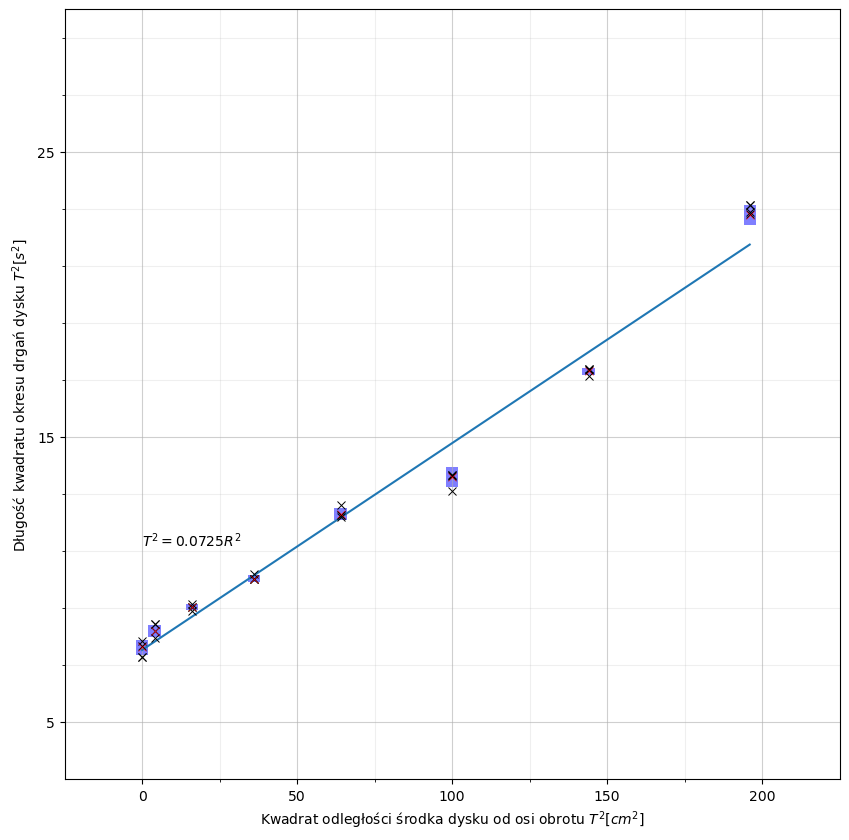

In [9]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Set plot size
fig.set_figwidth(10) 
fig.set_figheight(10)

# Grid
# X axis
major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

# Y axis
major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.6)


# Call function to create error boxes
_ = make_error_boxes(ax, x, y, xerr, yerr)

plt.plot(x,a*x+b)  # plot regression line
T1 = [ (t/5)**2 for t in df["5T_1"] ]
T2 = [ (t/5)**2 for t in df["5T_2"] ]
T3 = [ (t/5)**2 for t in df["5T_3"] ]

plt.plot(x,T1, "kx", markeredgewidth=0.7)
plt.plot(x,T2, "kx", markeredgewidth=0.7)
plt.plot(x,T3, "kx", markeredgewidth=0.7)
plt.plot(x,y,'rx', markeredgewidth=0.4) # plot mean

plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

# Adding labels
ax.set_ylabel(f"Długość kwadratu okresu drgań {obiekt.conjugated_name} $T^2 [s^2]$")
ax.set_xlabel(f"{obiekt.x_axis_description}")

# equation
plt.text(0,np.median(y), f"$T^2 = {a:.4f}R^2$")

plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
plt.show()